In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate 
%matplotlib notebook

In [190]:
df = pd.read_csv('PEEBlue.csv')
df

,V applied,V meter avg,V applied reverse,V meter avg reverse (mV)
0,0.885,0.773,-0.001,296.2
1,1.103,0.894,-0.303,167.1
2,1.457,1.080,-0.600,65.1
3,1.995,1.363,-0.908,15.4
4,2.533,1.641,-1.058,5.8
5,3.068,1.888,-1.193,1.8
6,3.157,2.075,-1.320,0.5
7,4.064,2.303,-1.355,0.1
8,5.010,2.649,-1.392,-0.1
9,5.510,2.825,-1.492,-0.6


<IPython.core.display.Javascript object>


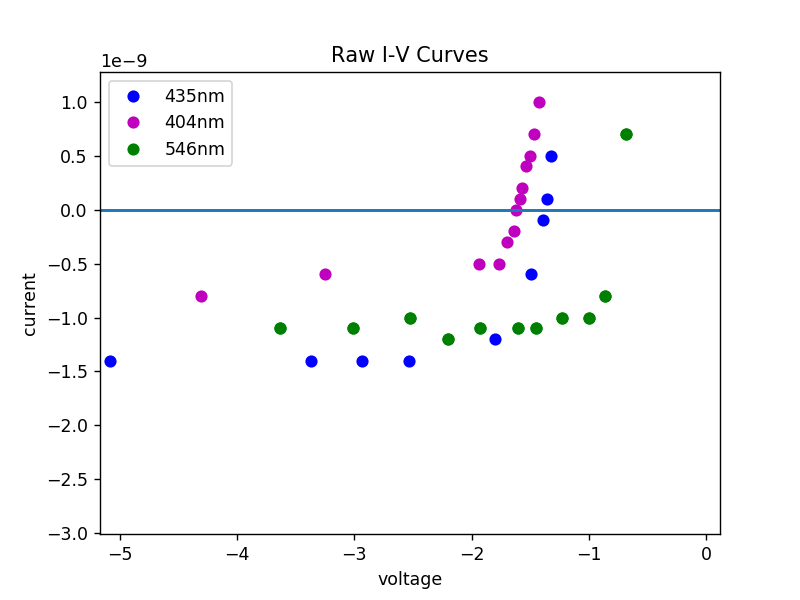

In [254]:

df = pd.read_csv('PEEBlue.csv')

#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'bo')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfBlue = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

fBlue = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - fBlue(df2['applied'].values)
corryBlue = correctedy
 
interpBlue = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 1)
 
#plt.plot(df2['applied'].values, df2['meter'].values, 'bo')
#plt.plot(df2['applied'].values, correctedy, 'bo')

#plt.plot(linex, interpBlue(linex))
#plt.plot(linex,fBlue(linex),'-k')


In [258]:
plt.savefig('zoomedRaw.png')

In [255]:
df = pd.read_csv('PEEViolate.csv')



#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'ro')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfViolate = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

f = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - f(df2['applied'].values)
corryviolate = correctedy
#plt.plot(df2['applied'].values, df2['meter'].values, 'ro')

interp = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 2)

corryviolate = corryviolate * interpBlue(20)/interp(20)

#plt.plot(df2['applied'].values, corryviolate, 'mo')
plt.plot(df2['applied'].values, df2['meter'].values, 'mo')


#plt.plot(linex,f(linex),'-k')
#plt.plot(linex, interp(linex))

#plt.axhline()


In [257]:
df = pd.read_csv('PEEGreen.csv')



#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'ro')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfGreen = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

f = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - f(df2['applied'].values)
corrygreen = correctedy
#plt.plot(df2['applied'].values, df2['meter'].values, 'ro')
interp = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 2)

corrygreen = corrygreen * interpBlue(20)/interp(20)


#plt.plot(df2['applied'].values, corrygreen, 'go')
plt.plot(df2['applied'].values, df2['meter'].values, 'go')

plt.title('Raw I-V Curves')
plt.legend(['435nm','404nm', '546nm'])
plt.ylabel('current')
plt.xlabel('voltage')
#plt.plot(linex,f(linex),'-k')
#plt.plot(linex, interp(linex))

plt.axhline()
plt.savefig('rawdata.png')


In [194]:
df = pd.read_csv('PEEUV.csv')

#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'ro')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfUV = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

f = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - f(df2['applied'].values)
corryUV = correctedy
# seems to only work for linear interpolation and no higher orders. unsure as to why.
interp = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 1)

corryUV = corryUV * interpBlue(20)/interp(20)

#plt.plot(df2['applied'].values, df2['meter'].values, 'go')
plt.plot(df2['applied'].values, corryUV, 'co')
plt.plot(linex, interp(linex))
plt.plot(linex,f(linex),'-c')
plt.axhline()


In [88]:
df2['applied'].values[13:30]


array([-1.858, -1.8  , -1.732, -1.514, -1.229, -0.867, -0.325,  0.   ,
        0.279,  1.137,  1.572,  2.075,  4.11 ,  8.06 , 15.37 , 30.11 ,
       60.   ])

In [263]:
interpGreen = scipy.interpolate.interp1d( dfGreen['applied'].values, corrygreen, 1)

xspaceGreen = np.linspace(dfGreen['applied'].values[12], dfGreen['applied'].values[30],10)
y = corrygreen[13:30]

mGreen, bGreen = np.polyfit(xspaceGreen,interpGreen(xspace),deg=1)

fGreen = lambda x: -1/mGreen*x + bGreen/mGreen
linex = np.linspace(corrygreen.min(),corrygreen.max(),1000)


plt.plot( corrygreen, -dfGreen['applied'].values, 'go')
plt.plot(linex,fGreen(linex),'-g')
#plt.plot(linex, interpGreen(linex),'g-')
print(m, b)

#######################################
interpBlue = scipy.interpolate.interp1d(dfBlue['applied'].values, corryBlue, 1)

xspaceBlue = np.linspace(dfBlue['applied'].values[14], dfBlue['applied'].values[17],10)

y = corryBlue[13:30]

mBlue, bBlue = np.polyfit(xspaceBlue,interpBlue(xspaceBlue),deg=1)

fBlue = lambda x: -1/mBlue*x + bBlue/mBlue
linex = np.linspace(corryBlue.min(),corryBlue.max(),1000)
plt.plot( corryBlue, -dfBlue['applied'].values, 'bo')

plt.plot(linex,fBlue(linex),'-b')
#plt.plot(linex, interpBlue(linex),'b-')
print(m, b)

########################################
interpViolate = scipy.interpolate.interp1d(dfViolate['applied'].values, corryviolate, 1)


xspaceViolate = np.linspace(dfViolate['applied'].values[22], dfViolate['applied'].values[25],10)

mViolate, bViolate = np.polyfit(xspaceViolate,interpViolate(xspaceViolate),deg=1)

fViolate = lambda x: -1/mViolate*x + bViolate/mViolate
linex = np.linspace(corryviolate.min(), corryviolate.max(),1000)
plt.plot( corryviolate, -dfViolate['applied'].values, 'mo')

plt.plot(linex,fViolate(linex),'-m')
#plt.plot(linex, interpViolate(linex),'m-')
print(m, b)

###########################################
"""
interpUV = scipy.interpolate.interp1d(dfUV['applied'].values, corryUV,  1)

xspaceUV = np.linspace(dfUV['applied'].values[22], dfUV['applied'].values[25],10)

y = corryUV[15:25]

mUV, bUV = np.polyfit(xspaceUV,interpUV(xspaceUV),deg=1)

fUV = lambda x: -1/mUV*x + bUV/mUV
linex = np.linspace(corryUV.min(),corryUV.max(),1000)
plt.plot( corryUV, -dfUV['applied'].values, 'co')

plt.plot(linex,fUV(linex),'-c')
#plt.plot(linex, interpUV(linex),'c-')
print(m, b)
"""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-263-06601e2c9057>, line 67)

<IPython.core.display.Javascript object>


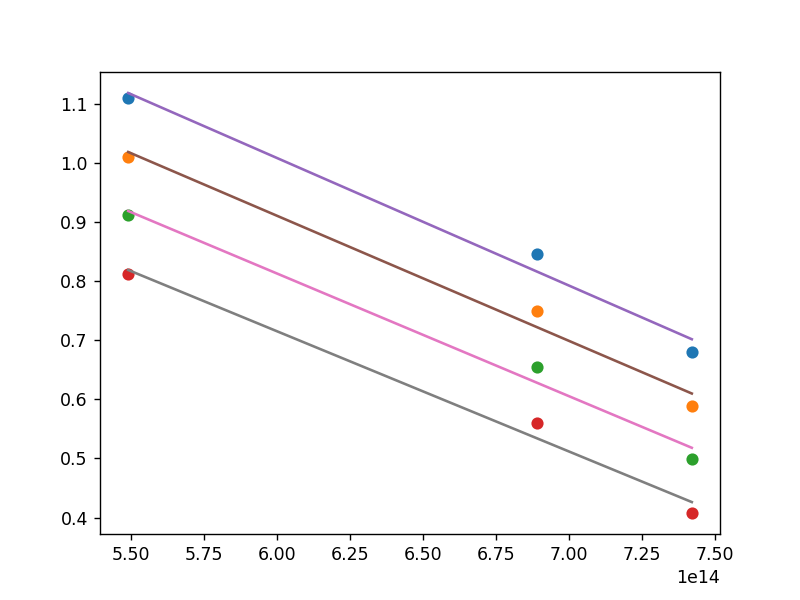

In [265]:
c =299792458

blue = []
green = []
violate = []
#UV = []

Ix = np.linspace(.1*10**-7, 1*10**-7, 4)

for i in Ix:
    blue.append(fBlue(i))
    green.append(fGreen(i))
    violate.append(fViolate(i))
    #UV.append(fUV(i))

df3 = pd.DataFrame([blue, violate, green], index=('blue', 'green', 'violate'))
nu = [c/(435*10**-9), c/(546*10**-9), c/(404*10**-9)]

Vsp0m, Vsp0b = np.polyfit(nu, df3[0].values, 1)
Vsp1m, Vsp1b = np.polyfit(nu, df3[1].values, 1)
Vsp2m, Vsp2b = np.polyfit(nu, df3[2].values, 1)
Vsp3m,Vsp3b = np.polyfit(nu, df3[3].values, 1)
fVsp0 = lambda x: x*Vsp0m + Vsp0b
fVsp1 = lambda x: x*Vsp1m + Vsp1b
fVsp2 = lambda x: x*Vsp2m + Vsp2b
fVsp3 = lambda x: x*Vsp3m + Vsp3b

nuspace = np.linspace(min(nu), max(nu), 10)
plt.plot(nu, df3.values, 'o')
plt.plot(nuspace, fVsp0(nuspace),'-')
plt.plot(nuspace, fVsp1(nuspace),'-')
plt.plot(nuspace, fVsp2(nuspace),'-')
plt.plot(nuspace, fVsp3(nuspace),'-')

In [262]:
h = 6.62607004 * 10**-34
h0 = (Vsp0m * -1.602*10**-19)
h1 = (Vsp1m * -1.602*10**-19)
h2 = (Vsp2m * -1.602*10**-19)
h3 = (Vsp3m * -1.602*10**-19)

print(h0, h1, h2, h3)
havg = (h0+ h1+ h2+ h3)/ 4
print("percent error for planks const",(h- havg)/h)



3.4599387103892177e-34 3.3937007674410555e-34 3.327462824492896e-34 3.2612248815447366e-34
percent error for planks const 0.49282428714457466


<IPython.core.display.Javascript object>


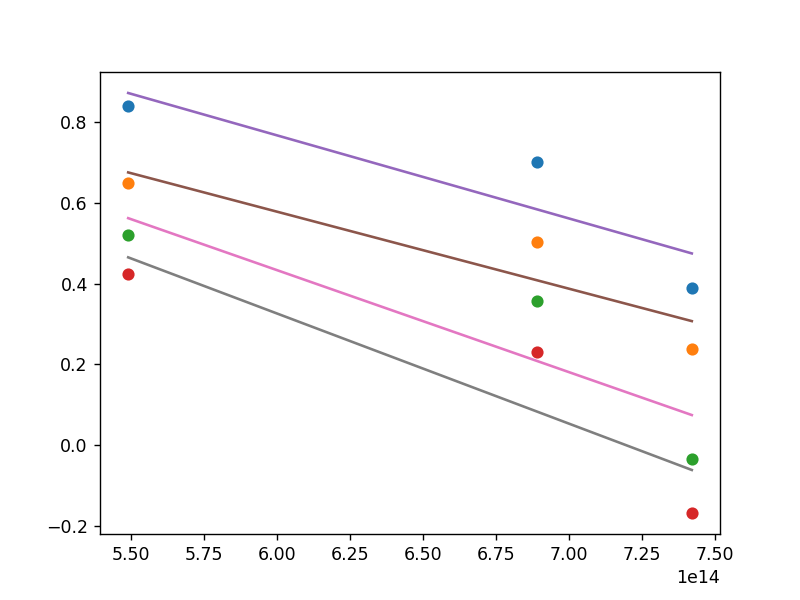

3.3015668005890374e-34 3.0601682248298806e-34 4.051885224702431e-34 4.375981109618079e-34
percent error for planks const 0.44199196241293315


In [236]:
interpViolate = scipy.interpolate.interp1d(corryviolate, -dfViolate['applied'].values, 1)
interpBlue = scipy.interpolate.interp1d( corryBlue, -dfBlue['applied'].values, 1)
interpGreen = scipy.interpolate.interp1d(corrygreen, -dfGreen['applied'].values, 1)

c =299792458

blue = []
green = []
violate = []
#UV = []

Ix = np.linspace(.5*10**-7, 2*10**-7, 4)

for i in Ix:
    blue.append(interpBlue(i))
    green.append(interpGreen(i))
    violate.append(interpViolate(i))
    #UV.append(fUV(i))

df3 = pd.DataFrame([blue, violate, green], index=('blue', 'green', 'violate'))
nu = [c/(435*10**-9), c/(546*10**-9), c/(404*10**-9)]

Vsp0m, Vsp0b = np.polyfit(nu, df3[0].values, 1)
Vsp1m, Vsp1b = np.polyfit(nu, df3[1].values, 1)
Vsp2m, Vsp2b = np.polyfit(nu, df3[2].values, 1)
Vsp3m,Vsp3b = np.polyfit(nu, df3[3].values, 1)
fVsp0 = lambda x: x*Vsp0m + Vsp0b
fVsp1 = lambda x: x*Vsp1m + Vsp1b
fVsp2 = lambda x: x*Vsp2m + Vsp2b
fVsp3 = lambda x: x*Vsp3m + Vsp3b

nuspace = np.linspace(min(nu), max(nu), 10)
plt.plot(nu, df3.values, 'o')
plt.plot(nuspace, fVsp0(nuspace),'-')
plt.plot(nuspace, fVsp1(nuspace),'-')
plt.plot(nuspace, fVsp2(nuspace),'-')
plt.plot(nuspace, fVsp3(nuspace),'-')

h = 6.62607004 * 10**-34
h0 = (Vsp0m * -1.602*10**-19)
h1 = (Vsp1m * -1.602*10**-19)
h2 = (Vsp2m * -1.602*10**-19)
h3 = (Vsp3m * -1.602*10**-19)

print(h0, h1, h2, h3)
havg = (h0+ h1+ h2+ h3)/ 4
print("percent error for planks const",(h- havg)/h)